# making something!

In [1]:
from lib import *
from extraversion_stress import *
from metrics import *

In [2]:
      
class make_friend(Action):

    def __init__(self, minT=0.5, maxT=10, homophily=None): # *args,**kwargs
        self.minT = minT
        self.maxT = maxT
        self.homophily = homophily
        
        super().__init__() 

    
    def act_time(self):
        if self.person.hours_per_week() == 0: return 1
        
        if self.person.hours_per_week() >= self.person.args['extraversion']:
            return 1000
        
        step1 = mu( 
            1 - self.person.args['extraversion'] / self.person.hours_per_week(),
            self.minT,
            self.maxT 
        )
        return step1
    
    def act(self, context):
        self.log("ACT_BEGIN!", context)
        from random import random, choice
        # go out to make a friend.
        # I decide to go do it...
        self.log("trying to make a friend", context)
        
        iwant = self.person.args['extraversion'] - self.person.hours_per_week()
        if iwant < 0:
            # this shouldn't be possible
            return
            
        potential_friends = {
            p for p in context.ppl
            if p != self.person and \
                p not in self.person.friends
            and p.hours_per_week() < p.args['extraversion']
        }
        
        if self.homophily is not None:
            for k,v in self.homophily.items():
                if random() > v: #filter with probability given
                    potential_friends = {x for x in potential_friends if x.args[k]==self.person.args[k]}
        
        #print([
        #    (p, self.person.friends) for p in context.ppl
        #    if p != self.person and \
        #        p not in self.person.friends
        #])
        potential_friends = list(potential_friends)
        
        if not len(potential_friends):
            self.log("No friends available... sad", context)
            return
            
        my_new_friend = choice(potential_friends)
        
        theywant = my_new_friend.args['extraversion'] - my_new_friend.hours_per_week()
        
        time_agree = np.random.uniform(iwant, theywant)
        
        my_new_friend.friends[self.person] = time_agree
        self.person.friends[my_new_friend] = time_agree
        
        self.log("Made friend w/ %s" % my_new_friend.name, context)

In [3]:
models = []

for i in range(10):
    print("%s/%s" % (i,10))
    people = [ Person(extraversion=float(i)/150+0.5, typ=i%2) for i in range(100) ]

    [p.addact([make_friend(minT=2,maxT=100,homophily={'typ':0.8}),end_friendship(maxT=100,minT=2)]) for p in people];

    m = sim(people, debug=False)
    m.addmet( degree_distribution )
    m.addmet( unhappiness_max )
    m.addmet( unhappiness_avg )
    m.addmet( network )
    m.addmet( percent_oversocialized )
    m.addmet( percent_lonely )
    m.run(100, 0.1)
    models.append(m)

0/10
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10


In [4]:
import matplotlib as mpl
mpl.style.use('classic')

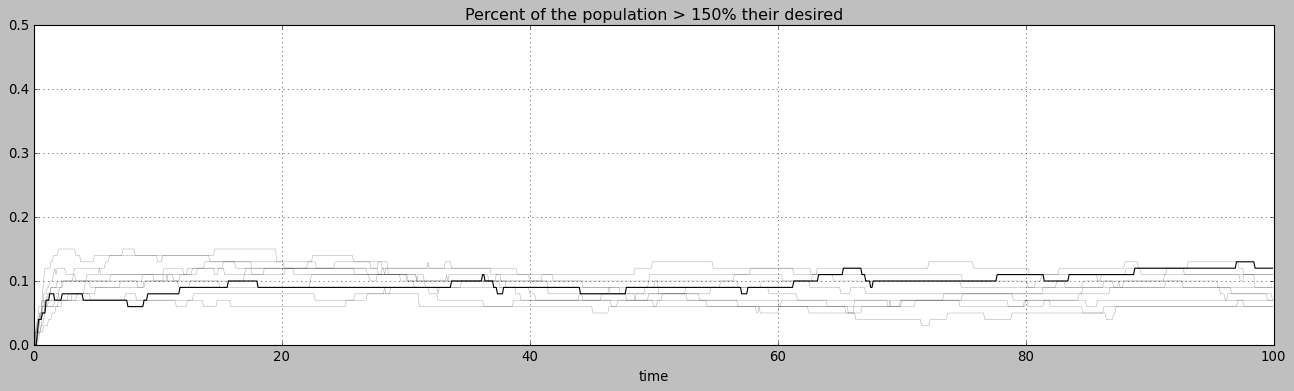

In [5]:
plt.figure(figsize=(20,5))

for i,m in enumerate(models):
    m.metrics['percent_oversocialized'].show(0,100, color='black', alpha=0.3 + 0.7 *(i==5), linewidth=0.5+0.5*(i==5))

plt.ylim((0,0.5))
plt.title("Percent of the population > 150% their desired")
plt.grid()
plt.show()

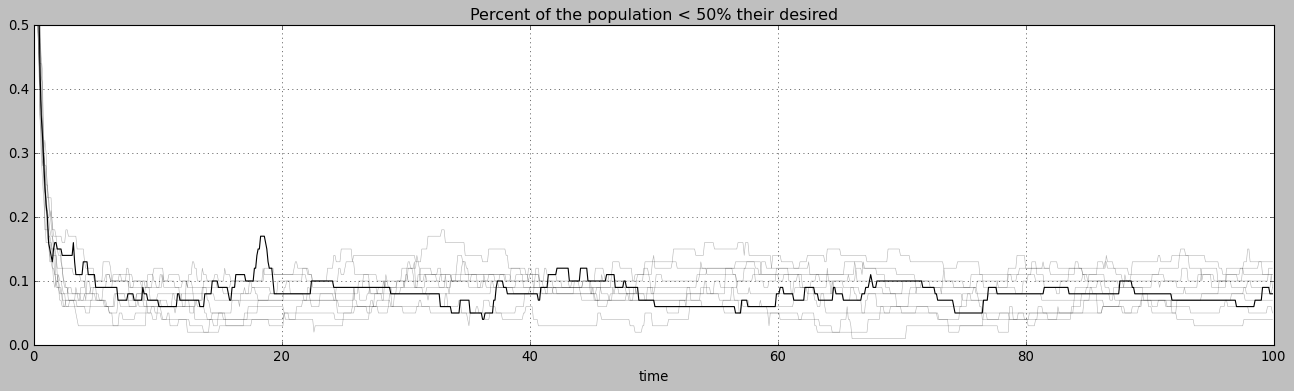

In [6]:
plt.figure(figsize=(20,5))

for i,m in enumerate(models):
    m.metrics['percent_lonely'].show(0,100, color='black', alpha=0.3 + 0.7 *(i==5), linewidth=0.5+0.5*(i==5))
plt.grid()
plt.ylim((0,0.5))
plt.title("Percent of the population < 50% their desired")
plt.show()

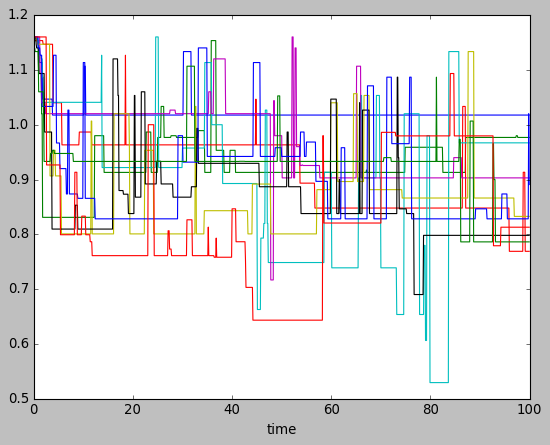

In [7]:
for m in models:
    m.metrics['unhappiness_max'].show(0,100)

plt.show()

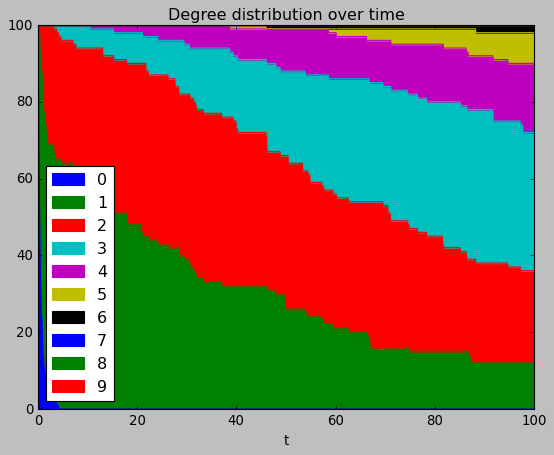

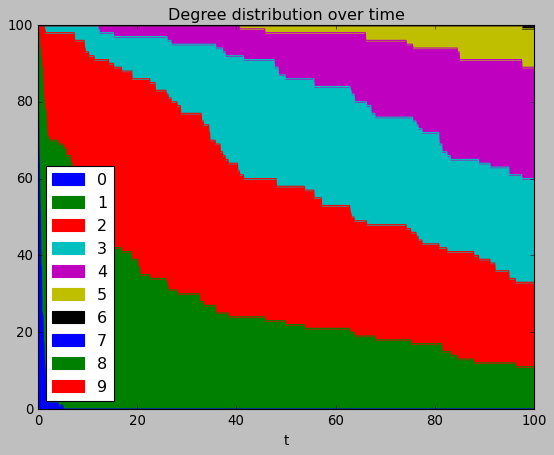

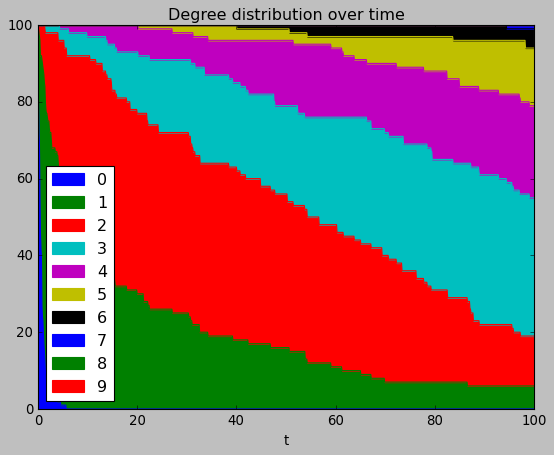

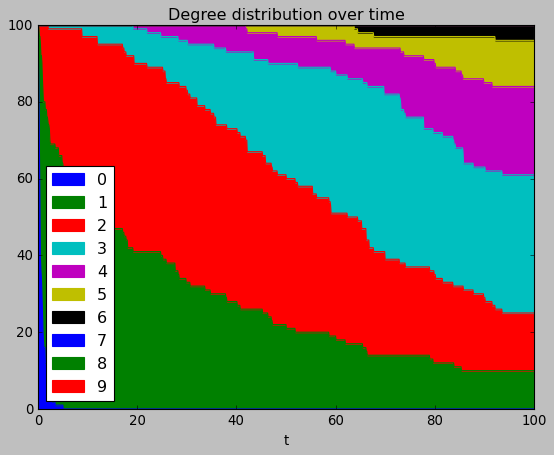

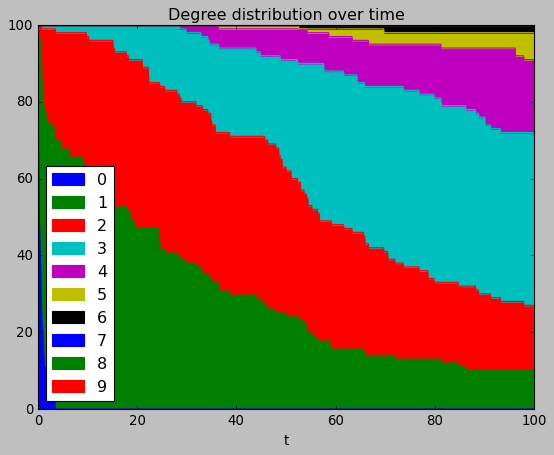

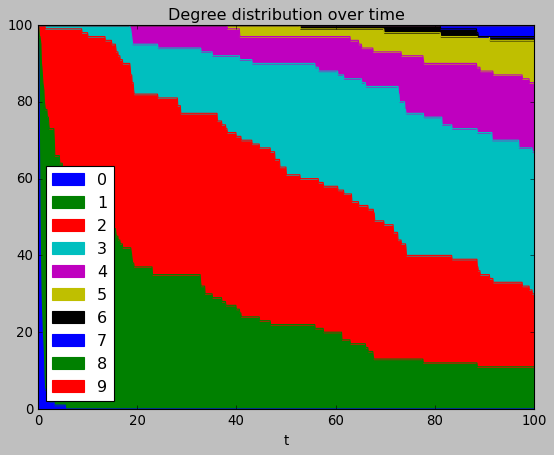

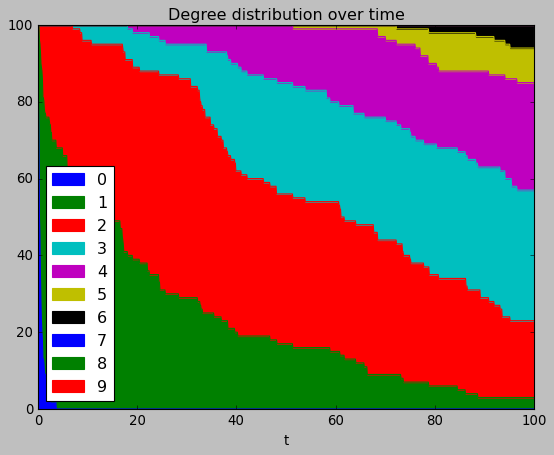

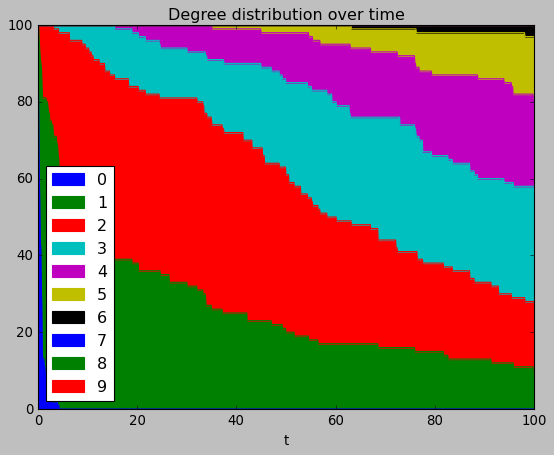

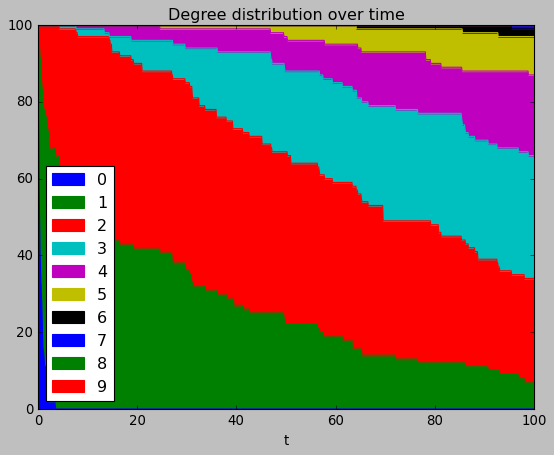

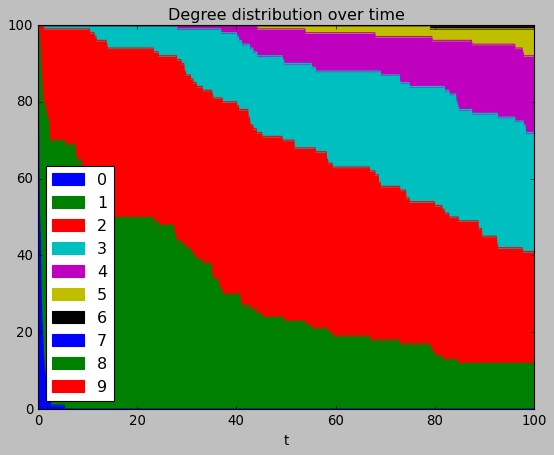

In [8]:
for m in models:
    m.metrics['degree_distribution'].show(0,500, deg_range=10)

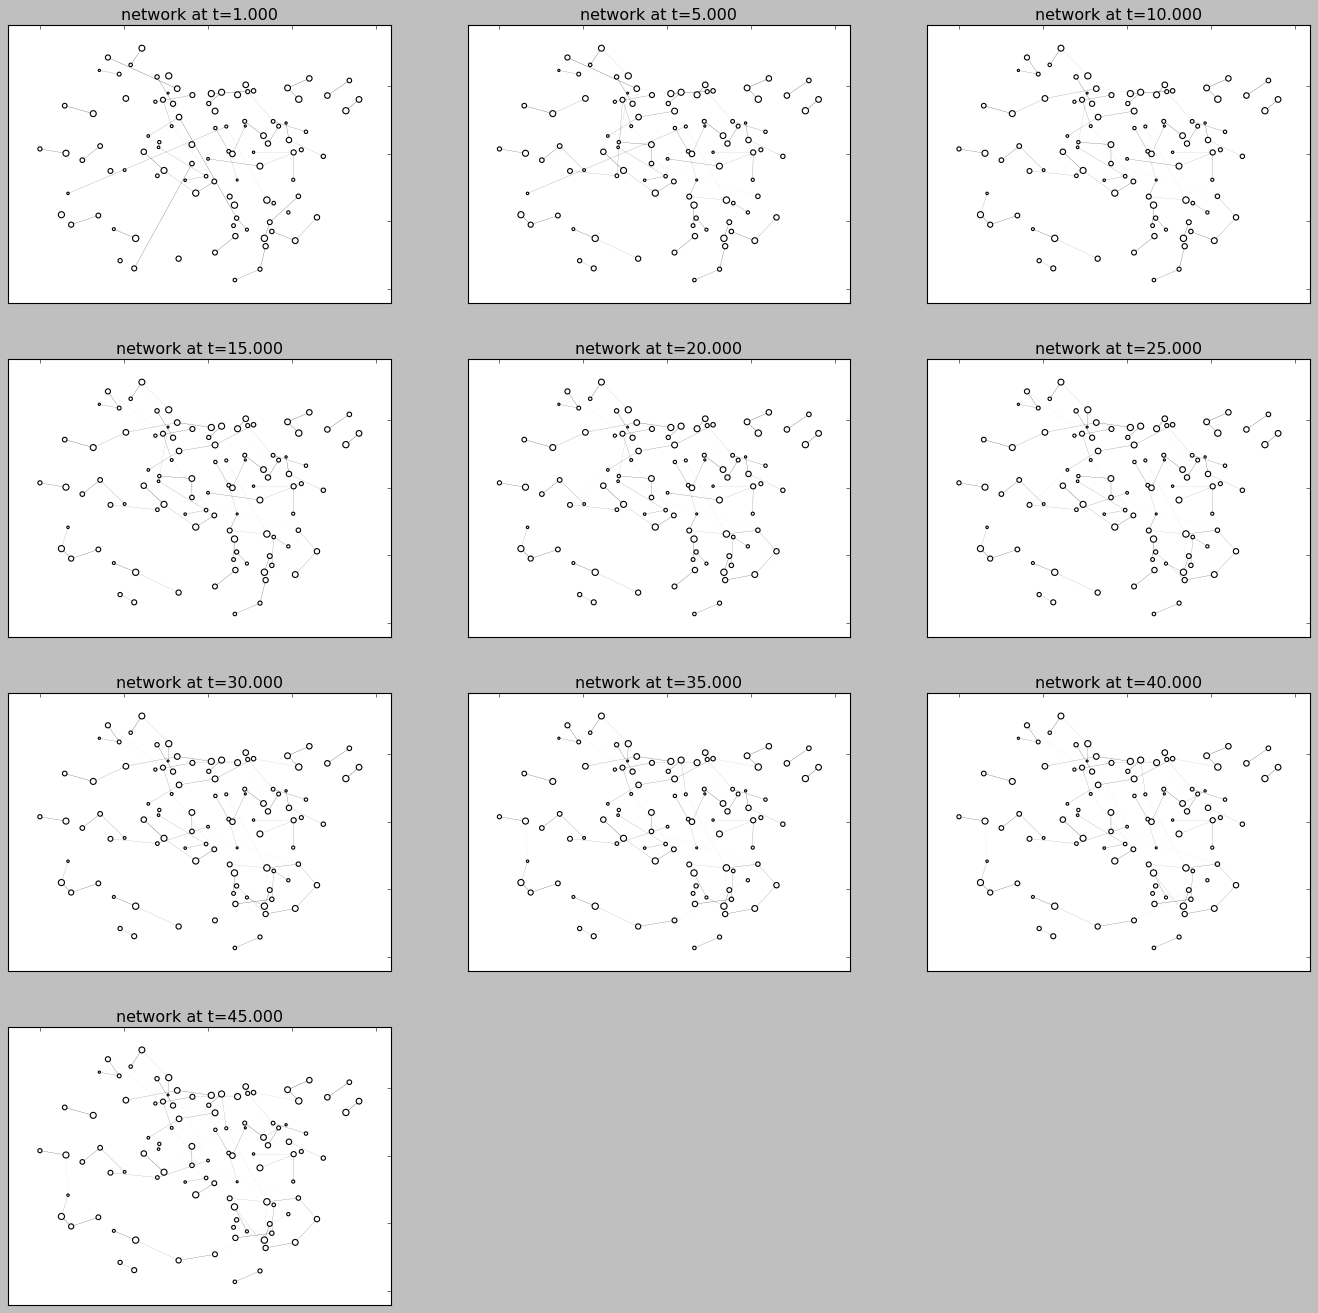

In [9]:
ts = [1,5,10,15,20,25,30,35,40,45]
models[0].metrics['network'].show(ts, nodecolor='typ')

In [10]:
ts = [1,5,10,15]
models[0].metrics['network'].show(animate=True, nodecolor='typ');

# making more things!

In [12]:
class breakup(Action):
    def prob(self):
        pass
    def act(self):
        pass
class moveaway(Action):
    def prob(self):
        pass
    def act(self):
        pass

class startclub(Action):
        self.meetings = []
    def prob(self):
        pass
    def act(self):
        pass

class joinclub(Action):
    def prob(self):
        pass
    def act(self):
        pass

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 14)